In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# Ingesting data
con = sqlite3.connect("csgo.db")
csgo_df = pd.read_sql_query("SELECT * FROM round INNER JOIN game WHERE round.game_id = game.id", con, parse_dates=["time"])
players_df = pd.read_sql_query("SELECT * from players", con)
csgo_df['time'] = pd.to_datetime(csgo_df['time'], utc=True)

# Some Pandas visual display options to read the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Creating some summary variables

In [2]:
csgo_df['survivingCount'] =  csgo_df.survivingPlayers.apply(lambda x: len(x[1:-1].split(',')) if x != 'null' else 0)
csgo_df['longestKillWaitS'] = csgo_df['longestKillWait']/csgo_df['tickrate']
csgo_df['lastKillToEndS'] = csgo_df['lastKillToEnd']/csgo_df['tickrate']
csgo_df["team_a_players_str"] = csgo_df.team_a_players.apply(lambda x: str(sorted(x[1:-1].split(','))))
csgo_df["team_b_players_str"] = csgo_df.team_b_players.apply(lambda x: str(sorted(x[1:-1].split(','))))
csgo_df["team_a_players"] = csgo_df.team_a_players.apply(lambda x: sorted(map(int, x[1:-1].split(','))))
csgo_df["team_b_players"] = csgo_df.team_b_players.apply(lambda x: sorted(map(int, x[1:-1].split(','))))
csgo_df["losingPlayers"] = np.where(csgo_df["losingTeamName"] == csgo_df["team_a"],  csgo_df["team_a_players"], csgo_df["team_b_players"])
csgo_df["losingPlayers_str"] = np.where(csgo_df["losingTeamName"] == csgo_df["team_a"],  csgo_df["team_a_players_str"], csgo_df["team_b_players_str"])
csgo_df['heTicks'] = csgo_df.heTicks.apply(lambda x: sorted(map(int, x[1:-1].split(','))) if x != "null" else [])
csgo_df['heTicksRelative'] = csgo_df.apply(lambda x: [y-x.startTick for y in x.heTicks ], axis=1)

In [3]:
csgo_df
;

,round_id,game_id,duration,losingTeamName,losingSide,startTick,endTick,endOfficialTick,survivingPlayers,losingTeamLeftoverMoney,equipmentSavedValue,killTicks,smokeTicks,molotovTicks,heTicks,longestKillWait,lastKillToEnd,round_no,heDamage,id,time,team_a,team_b,team_a_players,team_b_players,map,tickrate,survivingCount,longestKillWaitS,lastKillToEndS
0,1,1,59,BIG,3,17668,25251,25890,null,13900,0,"[22026,22099,22345,22602,22942,23282,24369,25251]","[18605,18694,18752,21382,21456,21729,23989,24386]","[21179,22178,24373]","[20321,21283,22665]",1087,0,1,32,1,2022-05-16 14:30:47+00:00,BIG,Vitality,"[76561198118196092,76561197961491680,76561197980122997,76561197997556936,76561198170631091]","[76561198113666193,76561197989744167,76561198004854956,76561197983956651,76561198081528911]",de_mirage,128,0,8.492188,0.000000
1,2,1,49,BIG,3,28450,34849,35489,null,28000,0,"[29989,31734,32150,32229,32794,33787,34849]","[29452,29634,32205]","[29654,30801]",[31687],1745,0,2,64,1,2022-05-16 14:30:47+00:00,BIG,Vitality,"[76561198118196092,76561197961491680,76561197980122997,76561197997556936,76561198170631091]","[76561198113666193,76561197989744167,76561198004854956,76561197983956651,76561198081528911]",de_mirage,128,0,13.632812,0.000000
2,3,1,114,BIG,3,38049,52763,53403,"[76561197980122997,76561197997556936]",18750,11150,"[41076,46280,46285,46291,47254,49147]","[38960,38963,40045,42096,42180,42452,42802,45406,47490]","[38791,39413,39970,46864,47922]","[39232,43680]",5204,3616,3,21,1,2022-05-16 14:30:47+00:00,BIG,Vitality,"[76561198118196092,76561197961491680,76561197980122997,76561197997556936,76561198170631091]","[76561198113666193,76561197989744167,76561198004854956,76561197983956651,76561198081528911]",de_mirage,128,2,40.656250,28.250000
3,4,1,72,Vitality,2,55963,65262,65901,null,23900,0,"[58135,58183,58436,59056,59204,59988,64708,65262]","[56946,57747,58132,58978,59143]","[56898,57776,57906,62557]","[57109,57881,60391]",4720,0,4,55,1,2022-05-16 14:30:47+00:00,BIG,Vitality,"[76561198118196092,76561197961491680,76561197980122997,76561197997556936,76561198170631091]","[76561198113666193,76561197989744167,76561198004854956,76561197983956651,76561198081528911]",de_mirage,128,0,36.875000,0.000000
4,5,1,82,Vitality,2,73963,84527,85166,null,12400,0,"[75520,77267,80812,81913,82673,82834,83338,83542,84527]","[74888,74961,75234,75238,76849,79346,83006]","[74709,75285,79024,82473]","[75594,76372]",3545,0,5,0,1,2022-05-16 14:30:47+00:00,BIG,Vitality,"[76561198118196092,76561197961491680,76561197980122997,76561197997556936,76561198170631091]","[76561198113666193,76561197989744167,76561198004854956,76561197983956651,76561198081528911]",de_mirage,128,0,27.695312,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18043,18044,724,80,Virtus.pro,2,482130,492490,493130,null,33650,0,"[484089,484909,488096,488201,488284,488862,489085,489341,490695]","[483051,485410,485451]","[483426,484175,484324,485282,486153]","[483839,483847,484147,489085]",3187,1795,25,77,724,2021-10-30 13:38:21+00:00,Virtus.pro,Team Vitality,"[76561197995817501,76561198134401925,76561198036125584,76561198127236290,76561198173201923]","[76561197989744167,76561198081528911,76561198113666193,76561198006920295,76561198005967969]",de_inferno,128,0,24.898438,14.023438
18044,18045,724,115,Virtus.pro,2,495690,510410,511050,[76561198036125584],21000,6950,"[502103,503742,503815,504428,504735,509366]","[496525,498713,501830,503475,503768,503841,503989]","[496773,497930,498254,498647,502575,502954,503685,503974]","[497405,498527,499001,501607,502390,503865]",4631,1044,26,71,724,2021-10-30 13:38:21+00:00,Virtus.pro,Team Vitality,"[76561197995817501,76561198134401925,76561198036125584,76561198127236290,76561198173201923]","[76561197989744167,76561198081528911,76561198113666193,76561198006920295,76561198005967969]",de_inferno,128,1,36.179688,8.156250
18045,18046,724,115,Virtus.pro,2,513610,528330,528970,null,15500,0,"[518273,518523

Create some averages of the data. For numerical values, we can immediately plot them.

In [4]:
yearly_average = csgo_df.resample("Y", on="time")
yearly_average.mean().dropna()
;

/tmp/ipykernel_8483/1524761603.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_average.mean().dropna()


''

In [5]:
monthly_average = csgo_df.resample("M", on="time")
monthly_average.mean().dropna()
;

/tmp/ipykernel_8483/330764374.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average.mean().dropna()


''

The average duration of CS:GO rounds. As you can see, a clear upwards trend.

/tmp/ipykernel_8483/1175145296.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  duration_plot = monthly_average[["time", "duration"]].mean().dropna()


<Axes: xlabel='time'>

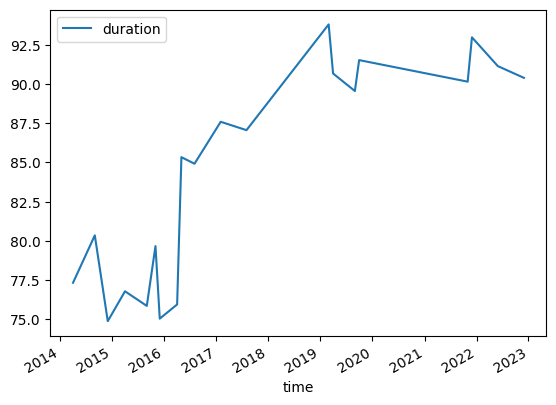

In [6]:
duration_plot = monthly_average[["time", "duration"]].mean().dropna()
duration_plot.plot()

/tmp/ipykernel_8483/683167702.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survivingp_plot = monthly_average[["time", "survivingCount"]].mean().dropna()


<Axes: xlabel='time'>

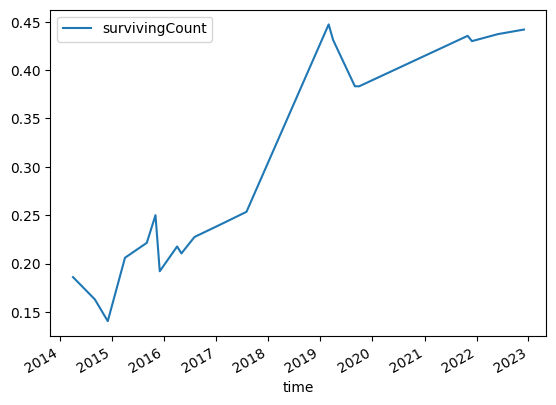

In [7]:
survivingp_plot = monthly_average[["time", "survivingCount"]].mean().dropna()
survivingp_plot.plot()

/tmp/ipykernel_8483/3828588760.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average[['time', 'heDamage']].mean().dropna().plot()


<Axes: xlabel='time'>

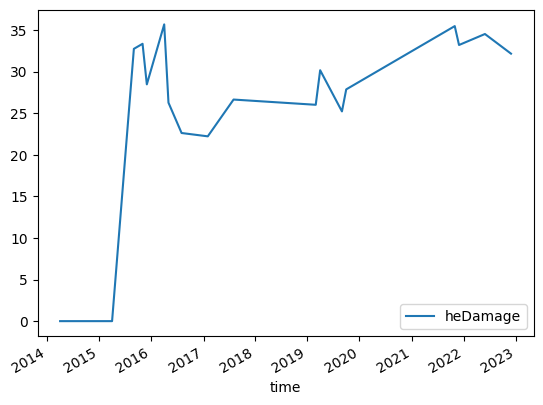

In [8]:
monthly_average[['time', 'heDamage']].mean().dropna().plot()

/tmp/ipykernel_8483/538616652.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  longestkill_plot = monthly_average[["time", "longestKillWaitS"]].mean().dropna()


<Axes: xlabel='time'>

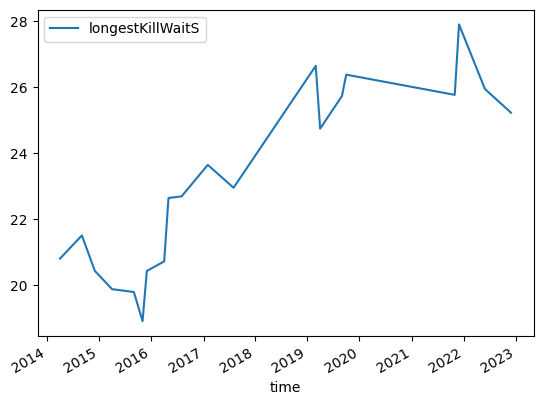

In [9]:
longestkill_plot = monthly_average[["time", "longestKillWaitS"]].mean().dropna()
longestkill_plot.plot()

/tmp/ipykernel_8483/3064090705.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average[['time', 'lastKillToEndS']].mean().dropna().plot()


<Axes: xlabel='time'>

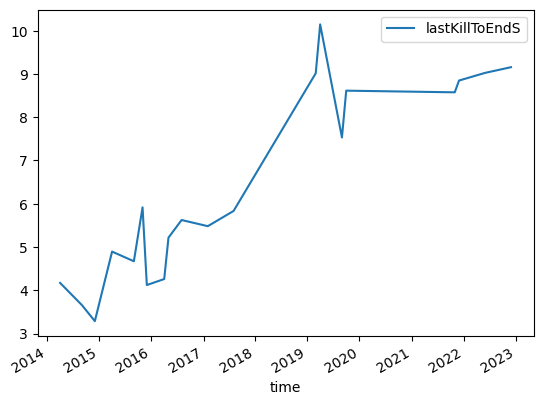

In [10]:
monthly_average[['time', 'lastKillToEndS']].mean().dropna().plot()

In [28]:
csgo_df.map.explode().value_counts().to_frame()

,map
de_mirage,3018
de_inferno,2996
de_dust2,2430
de_overpass,2094
de_nuke,1800
de_cbble,1579
de_train,1478
de_cache,1215
de_vertigo,778
de_ancient,660


# Calculating the players that save the most

In [13]:
survivingRounds = csgo_df.loc[csgo_df["survivingCount"] > 0]
survivingRounds
;

''

This is not a list of the most saved players - it is a list of players on teams that save the most. dupreeh might not have saved 235 times, but the teams he's been on have.

I would say that Jame and Qikert's position is quite notable. 

In [15]:
survivingRounds.losingPlayers.explode().value_counts().to_frame().reset_index().rename(columns={"index":"SteamID64", "losingPlayers": "roundsSaved"}).merge(players_df)[['name', 'roundsSaved']].groupby('roundsSaved').agg(list)

,name
roundsSaved,
1,"[disturbed, xartE, HUNDEN, Detrony #INTEL, deviaNt #COREX, KHRN, natu, AcilioN, blackpoisoN #RAZER, cent #ALIENWARE, racno-.`SGMF.<..>, stonde]"
2,"[WOLF > R i X, WOLF > Ace, WOLF > Mithil:D, WOLF > RiTz, oSee, WOLF > astaRRRRR, desi]"
3,"[ptr, ub1que, steel * ADATA, zEVES, Polly * XTRFY, yam]"
4,"[DEVIL, THREAT]"
5,"[Furlan, peet, pita, koosta, GruBy, rallen, Hyper, [R]eason LOMME * SteelSeries, innocent, zehN, HS, [R]eason EXR * SteelSeries, suNny]"
...,...
205,"[Jame, Qikert]"
207,[device]
212,[Zeus]


This is a list of players that have saved the most.

In [16]:
csgo_df["survivingPlayers"] = csgo_df.survivingPlayers.apply(lambda x: sorted(map(int, x[1:-1].split(','))) if x != 'null' else None)

In [17]:
savingPlayers = csgo_df.survivingPlayers.explode().value_counts().to_frame().reset_index(names="SteamID64").rename(columns={"survivingPlayers": "roundsSurvived"}).merge(players_df)
savingPlayers

,SteamID64,roundsSurvived,name,apps
0,76561198036125584,116,Jame,47
1,76561198004854956,91,dupreeh,111
2,76561198034202275,87,s1mple,75
3,76561197987713664,74,device,109
4,76561197972331023,72,GuardiaN,77
...,...,...,...,...
299,76561197987053545,1,ub1que,2
300,76561197981508015,1,LEGIJA,6
301,76561197980539257,1,DavCost,7
302,76561198003756239,1,jR,2


In [18]:
savingPlayers[['name', 'roundsSurvived']].groupby('roundsSurvived').agg(list)

,name
roundsSurvived,
1,"[Golden, hooch, [R]eason EXR * SteelSeries, cent #ALIENWARE, HaRtsSsSsSs * ZOWIE GEAR, STYKO, Professor_Chaos, AcilioN, zEVES, rallen, SENER1, DEVIL, GruBy, zehN, xartE, rigoN, yam, ub1que, LEGIJA, DavCost, jR, innocent]"
2,"[WOLF > RiTz, Hyper, steel * ADATA, Havoc[K] MSi, SPUNJ MSi, EPSILON Sf * GAMDIAS, SIXER, Furlan, THREAT, pyth, USTILO, krystaLAW *Platincasino, Troubley * WorldofCDKeys.com, iBP anger, koosta, zonic, AZK * ASRock, abE, smF, keshandr, oskar, fel1x *Platincasino, suNny, zqkS]"
3,"[emagine, SnypeR, keev, pita, LDLC.com KQLY Cooler Master, spaze, HS, James, juanflatroo, sinnopsyy, lauNX, svyat, Zero, Grim, swag * Intel]"
4,"[mir, mezii, Zellsis, Lucky, XANTARES, cype * Gunnar Optics, Staehr, fR11$HAAA, zews, doto, arya, peet, daps, gade, speed4k, FNS, kinqie, DaZeD Netcodeguides.com, LDLC.com Uzzziii Cooler Master, faveN, CW Nico * Komplett]"
5,"[Cloud9 CS seM <ALIENware>, Devilwalk.teg * Fragnet, maden, Pimp, disco doplan, HooXi, tiziaN]"
...,...
72,[GuardiaN]
74,[device]
87,[s1mple]


# Calculating the ratio of appearances within the dataset, and the amount they save

In [19]:
savingPlayers['mostSaved'] = savingPlayers['roundsSurvived']/savingPlayers['apps']

### Players with the lowest survival/appearances ratio

In [20]:
savingPlayers.loc[savingPlayers['apps'] > 20 ].sort_values(by='mostSaved').head(20)[['name', 'apps', 'roundsSurvived', 'mostSaved']]

,name,apps,roundsSurvived,mostSaved
209,B1ad3,26,6,0.230769
215,Cloud9 CS seM <ALIENware>,21,5,0.238095
102,friberg,76,19,0.250000
117,dennis,61,16,0.262295
98,byali,75,20,0.266667
213,ANGE1,22,6,0.272727
198,MSL,23,7,0.304348
197,FeTiSh[MB],23,7,0.304348
67,f0rest,90,28,0.311111
106,pronax,60,19,0.316667


### Players with the highest survival/appearances ratio

In [21]:
savingPlayers.loc[savingPlayers['apps'] > 20 ].sort_values(by='mostSaved', ascending=False).head(20)[['name', 'apps', 'roundsSurvived', 'mostSaved']]

,name,apps,roundsSurvived,mostSaved
0,Jame,47,116,2.468085
15,frozen,28,52,1.857143
6,buster,35,65,1.857143
5,cadiaN,38,69,1.815789
29,FL1T,27,45,1.666667
43,Liazz,23,36,1.565217
38,drop,25,38,1.520000
25,ropz,32,46,1.437500
33,JaCkz,31,43,1.387097
7,Qikert,47,65,1.382979


<Axes: xlabel='time'>

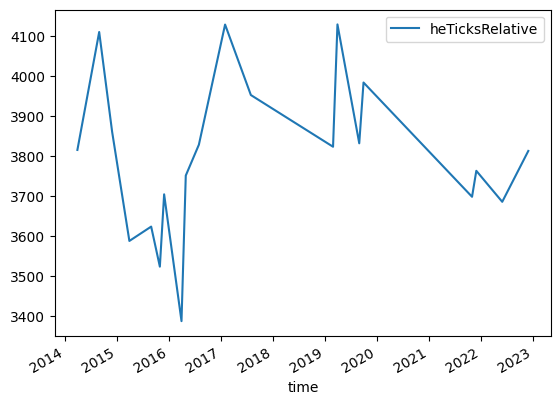

In [23]:
csgo_df[['time', 'heTicksRelative']].explode('heTicksRelative').resample("M", on="time").mean().dropna().plot()

In [24]:
csgo_df.losingPlayers.explode().value_counts().to_frame().reset_index().rename(columns={"index":"SteamID64", "losingPlayers": "roundsPlayed"}).merge(players_df)


,SteamID64,roundsPlayed,name,apps
0,76561197988627193,1273,olofmeister,109
1,76561198004854956,1233,dupreeh,111
2,76561197987713664,1179,device,109
3,76561197990682262,1144,Xyp9x,106
4,76561197989744167,1137,apEX,88
...,...,...,...,...
340,76561197987053545,30,ub1que,2
341,76561197960677505,30,arya,2
342,76561197996060155,6,raalzZZzz * Razer,1
343,76561197969695108,5,oSee,1


## Players that take the most amount of time to lose

In [25]:
durations = csgo_df.explode("losingPlayers").reset_index()[["duration", "losingPlayers"]].rename(columns={"losingPlayers": "SteamID64"}).merge(players_df)[["duration", "name", "apps"]]

### Players that took the least amount of time to lose

In [26]:
durations.groupby('name').agg(list).applymap(np.mean).sort_values(by='duration').head(30)

,duration,apps
name,,
raalzZZzz * Razer,55.500000,1.0
WOLF > Ace,58.218750,2.0
WOLF > R i X,58.218750,2.0
WOLF > RiTz,58.218750,2.0
WOLF > astaRRRRR,58.218750,2.0
WOLF > Mithil:D,58.218750,2.0
Detrony #INTEL,59.500000,2.0
deviaNt #COREX,59.500000,2.0
blackpoisoN #RAZER,59.500000,2.0


### Players that took the most amount of time to lose

In [27]:
durations.groupby('name').agg(list).applymap(np.mean).sort_values(by='duration', ascending=False).head(30)

,duration,apps
name,,
HaRtsSsSsSs * ZOWIE GEAR,116.904762,3.0
fitch,106.216495,7.0
KrizzeN,106.216495,7.0
FL1T,103.655280,27.0
fame,102.966942,12.0
n0rb3r7,102.966942,12.0
Jame,102.042662,47.0
Qikert,102.042662,47.0
buster,101.802151,35.0
